<a href="https://colab.research.google.com/github/Pravallika1234uppala/ML/blob/main/ML%20Models/Supervised%20Learning/Classification%20Models/Logistic%20Regression/Simple%20Logistic%20Regression/Logistic_Regression_for_Imbalanced_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## LOGISTIC REGRESSION FOR IMBALANCED DATASET:

In [1]:
#out of all data points, The output categories ratio is imbalanced then it is imbalanced data
#class weights - parameter used to assign more importance to less ratio of category

In [2]:
from collections import Counter
from sklearn.datasets import make_classification

In [3]:
##getting imbalanced dataset
X, y = make_classification(n_samples=20000, n_features=3, n_clusters_per_class=1, n_redundant=0, weights=[0.99], random_state=42)
#weight=[0.99] then one of the category is 99% more points than other.


In [4]:
X

array([[-0.82129198,  0.84434563,  1.81273542],
       [-0.30662322, -0.92590463, -0.49141382],
       [-1.0745934 ,  2.15008182,  0.65608365],
       ...,
       [-0.66230732,  0.59247546, -0.40652415],
       [-1.35339399,  1.66352077, -0.78565129],
       [-1.11107873,  0.34796112,  0.87678086]])

In [5]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [6]:
Counter(y)

Counter({0: 19698, 1: 302})

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: xlabel='0', ylabel='1'>

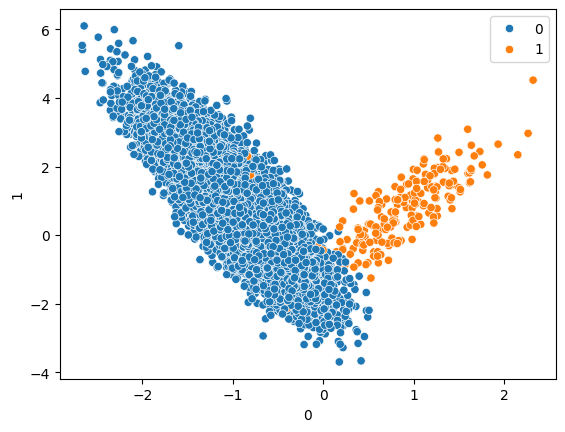

In [8]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1], hue=y)

<Axes: xlabel='0', ylabel='2'>

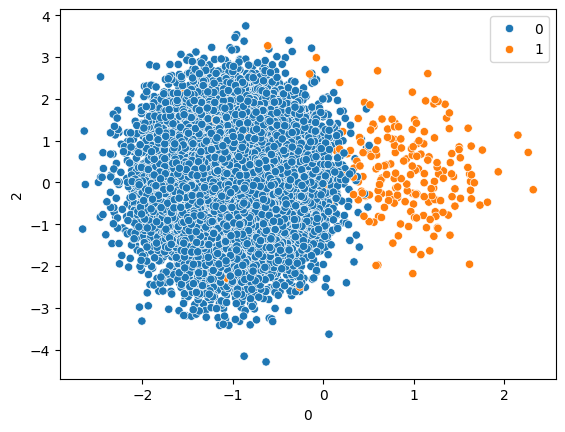

In [9]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[2], hue=y)

In [10]:
#To solve this imbalanced dataset using Logistic Regression.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.29, random_state=42)

In [11]:
X_train

array([[-1.13551284,  1.8408875 ,  0.57842889],
       [-0.54553027,  0.62726421, -1.09112165],
       [-1.36210304,  1.30568995, -1.60887422],
       ...,
       [-0.62958899, -0.54031031,  1.56584589],
       [-1.48092689,  3.1421726 ,  1.18738484],
       [-0.42744993, -0.63329853,  0.14191241]])

In [12]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [13]:
X_test

array([[-0.87317222,  1.41988571,  0.5205198 ],
       [-1.4946853 ,  1.69135325,  0.36196037],
       [-1.21520006,  0.43614578, -0.50384399],
       ...,
       [-1.2411896 ,  1.64981443,  1.28251975],
       [-0.63802722, -0.59281757,  1.46394688],
       [-1.31069316,  1.85556312,  0.98967044]])

In [14]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

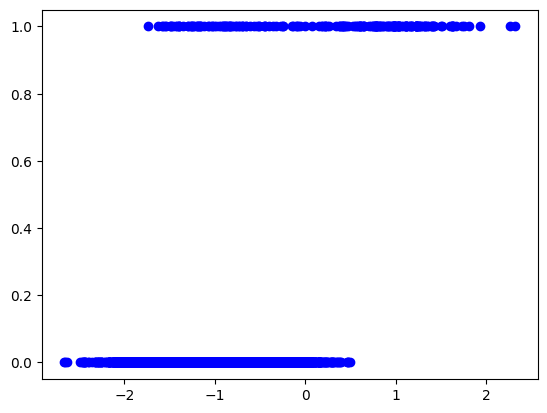

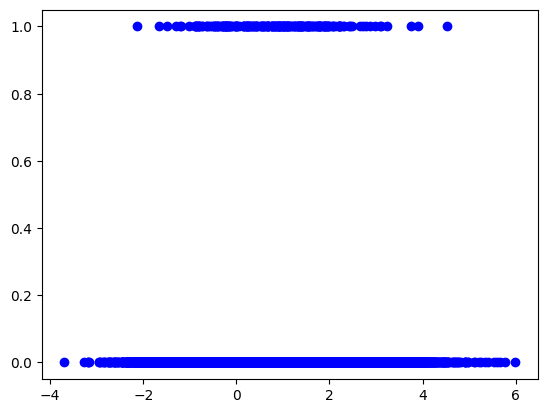

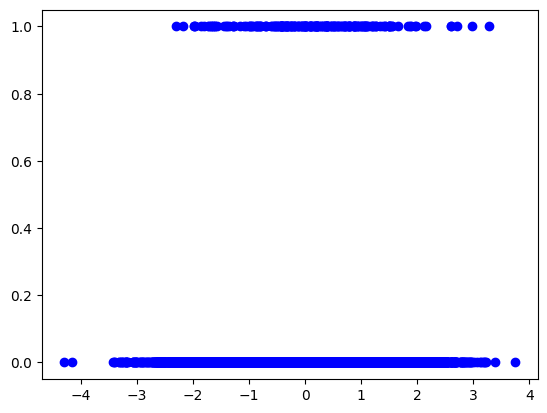

In [15]:
#plotting training data - to look for better model
X_t = pd.DataFrame(X_train)

for column in X_t.columns:
  plt.scatter(X_t[column], y_train, color='blue')
  plt.show()

In [16]:
#for this kind of plot - lOgistic model is better

#but as this is imbalanced data.
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


In [17]:
model

LogisticRegression()

In [18]:
penalty=['l1', 'l2', 'elasticnet']
c_values = [100,10,0.5,0.1, 0.01]
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
class_weight=[{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]
#new parameter to play with imbalanced dataset.
#class_weight - balanced (equal importanve for output categories) can use for equal outputs
#otherwise dictionary
#({0: 19698, 1: 302}) so, almost 6-7 times more importance.
#This is nothing but diff combinations b/w 4 numbers

In [19]:
class_weight

[{0: 1, 1: 1},
 {0: 1, 1: 10},
 {0: 1, 1: 50},
 {0: 1, 1: 100},
 {0: 10, 1: 1},
 {0: 10, 1: 10},
 {0: 10, 1: 50},
 {0: 10, 1: 100},
 {0: 50, 1: 1},
 {0: 50, 1: 10},
 {0: 50, 1: 50},
 {0: 50, 1: 100},
 {0: 100, 1: 1},
 {0: 100, 1: 10},
 {0: 100, 1: 50},
 {0: 100, 1: 100}]

In [20]:
#creating all paraameters in dictionary
params = dict(penalty=penalty, C=c_values, solver=solver, class_weight=class_weight)

In [21]:
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 0.5, 0.1, 0.01],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 50},
  {0: 10, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 50},
  {0: 100, 1: 100}]}

In [22]:
#1. Grid Search CV
#2.  Randomised Search CV
from sklearn.model_selection import GridSearchCV, StratifiedKFold
cv = StratifiedKFold()
grid = GridSearchCV(estimator=model, param_grid=params, scoring='accuracy', cv=cv, n_jobs=-1)

#estimator - model used, param_grid - parameters used, scoring-accuracy in binary classification.
#cv used is Stratified k Fold
# n_jobs = -1 will lets you use all processors in the system.

In [23]:
grid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 0.5, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [24]:
grid.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
3200 fits failed out of a total of 6000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_s

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 0.5, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [25]:
grid.best_params_

{'C': 100,
 'class_weight': {0: 1, 1: 10},
 'penalty': 'l1',
 'solver': 'liblinear'}

In [26]:
y_predgrid=grid.predict(X_test)

In [27]:
y_predgrid

array([0, 0, 0, ..., 0, 0, 0])

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
score = accuracy_score(y_test, y_predgrid)
print(score)
cm = confusion_matrix(y_test, y_predgrid)
print(cm)
print(classification_report(y_test, y_predgrid))

0.9946551724137931
[[5713    0]
 [  31   56]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5713
           1       1.00      0.64      0.78        87

    accuracy                           0.99      5800
   macro avg       1.00      0.82      0.89      5800
weighted avg       0.99      0.99      0.99      5800



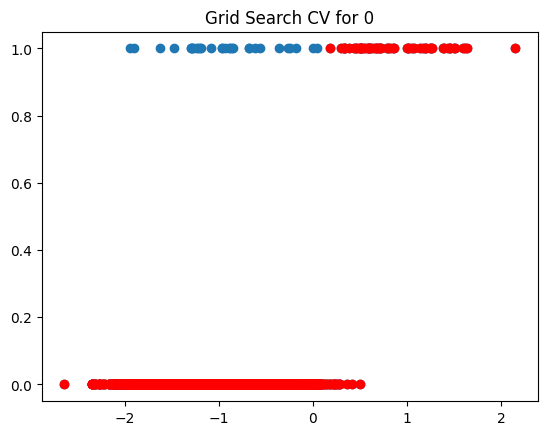

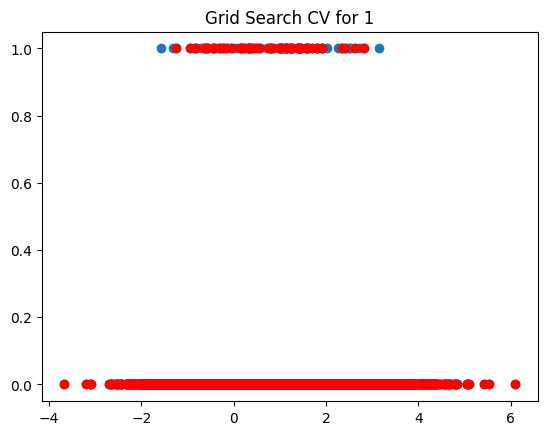

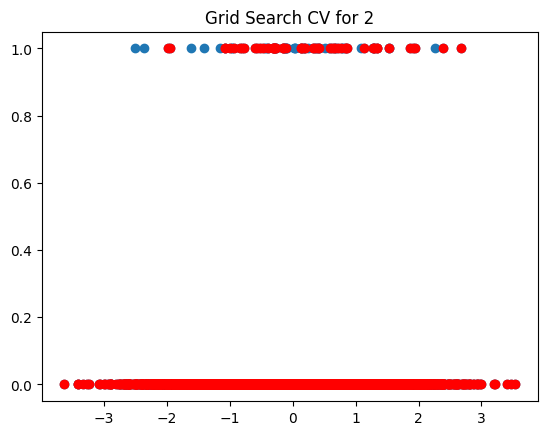

In [29]:
Xt_df = pd.DataFrame(X_test)
for column in Xt_df.columns:
  plt.scatter(Xt_df[column], y_test)
  plt.scatter(Xt_df[column], grid.predict(X_test), color='red')
  plt.title(f'Grid Search CV for {column}')
  plt.show()

In [30]:
from sklearn.model_selection import RandomizedSearchCV
model = LogisticRegression()
randomcv = RandomizedSearchCV(estimator=model, param_distributions=params, cv=5, scoring='accuracy')


In [31]:
randomcv.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solver(

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [100, 10, 0.5, 0.1, 0.01],
                                        'class_weight': [{0: 1, 1: 1},
                                                         {0: 1, 1: 10},
                                                         {0: 1, 1: 50},
                                                         {0: 1, 1: 100},
                                                         {0: 10, 1: 1},
                                                         {0: 10, 1: 10},
                                                         {0: 10, 1: 50},
                                                         {0: 10, 1: 100},
                                                         {0: 50, 1: 1},
                                                         {0: 50, 1: 10},
                                                         {0: 50, 1: 50},
                                                         {0: 50, 1: 100},
                                                         {0: 100, 1: 1},
                                                         {0: 100, 1: 10},
                                                         {0: 100, 1: 50},
                                                         {0: 100, 1: 100}],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [32]:
randomcv.best_score_

0.9938028169014084

In [33]:
randomcv.best_estimator_

LogisticRegression(C=10, class_weight={0: 1, 1: 10}, solver='sag')

In [34]:
randomcv.best_params_

{'solver': 'sag', 'penalty': 'l2', 'class_weight': {0: 1, 1: 10}, 'C': 10}

In [35]:
y_predrandcv = randomcv.predict(X_test)

In [36]:
score = accuracy_score(y_test, y_predrandcv)
print(score)
cm = confusion_matrix(y_test, y_predrandcv)
print(cm)
print(classification_report(y_test, y_predrandcv))

0.9946551724137931
[[5713    0]
 [  31   56]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5713
           1       1.00      0.64      0.78        87

    accuracy                           0.99      5800
   macro avg       1.00      0.82      0.89      5800
weighted avg       0.99      0.99      0.99      5800

